# Problem 3. Comparison of MLP and CNN
In this assignment, you will compare two models ( MLP & CNN)




## Import libraries including PyTorch

In [1]:
#Importing all libraries
import os
import time
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import PIL
from PIL import Image
from torchvision import datasets 


## Load the data

In [2]:
train_transform = transforms.Compose(
    [#transforms.RandomHorizontalFlip(p=0.5),
     #transforms.RandomAffine(degrees=(-5, 5), translate=(0.1, 0.1), scale=(0.9, 1.1), resample=PIL.Image.BILINEAR), ##DATA AUGMENTATION 
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
     ])

test_transform = transforms.Compose(
    [
     transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))
     ])

dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=train_transform)
train_set, val_set = torch.utils.data.random_split(dataset, [50000, 10000])

train_loader = torch.utils.data.DataLoader(train_set, batch_size=128, shuffle=True, num_workers=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=128, shuffle=False, num_workers=1)

test_set = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=128, shuffle=False, num_workers=1)

classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]   


100%|██████████| 26421880/26421880 [00:01<00:00, 16078644.35it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 283218.03it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5103792.18it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21336242.09it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



## A CNN Model with MaxPooling layers from Problem 2
You can copy the model below. Then, train and obtain the necessary analyzation data.


In [3]:
"""

USE CNN Model from Problem 2 in CNN_problem_2.ipynb

"""
###########################################################################
# PLACE YOUR CODE HERE                                                    #
###########################################################################
class CNN_Max(nn.Module):
  """
  A convolutional neural network (CNN). In this CNN object, we will use following
  dimensions:

  input_size: the dimension d of the input data.                        
  hidden_size: the number of neurons h in the hidden layer.             
  output_size: the number of classes c, which is 10 in our task          
  """
  def __init__(self):
    """
    An initialization function. This object of network is a simple feed-forward 
    network. It takes an input to pass to muitiple layers. Then, provide the 
    output. The layers are initialized after their creation. 

    In this problem, we will use following set of parameters building a CNN/

    conv: convolutional kernel size, which is 3 by 3 with bias                         
    pool: pooling kernel-size, which is 2 by 2    
    dropout: random zeroing layer with probability 0.4                            
    fc: fully-connected layer which uses affine operation y=Wx+b              

    Parameters
    ----------
    N/A
    """
    super(CNN_Max, self).__init__()
 
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, bias=True)  
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, bias=True)
    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=1)
    self.linear1 = nn.Linear(in_features=64*22*22, out_features=64, bias=True)
    self.linear2 = nn.Linear(in_features=64, out_features=32, bias=True)
    self.linear3 = nn.Linear(in_features=32, out_features=10, bias=True)
    self.dropout = nn.Dropout(p=0.7)

  def forward(self, x):
    """
    A forward pass function. Using the pre-defined network modules, we can here 
    build a model designing its structure. 

    Parameters
    ---------- 
    x: matrix  
      an input data of shape (1, d, d), where d is the dimension of the input 
      image. 
  
    Returns
    ---------- 
    out:     
      an output data given x.

    """
    x = self.conv1(x)                 # (1, 28, 28)  -> (32, 26, 26)
    x = self.maxpool(x)               # (32, 26, 26) -> (32, 25, 25)

    x = self.conv2(x)                 # (32, 25, 25) -> (64, 23, 23)
    x = self.maxpool(x)               # (64, 23, 23) -> (64, 22, 22)
    x = self.dropout(x)
    
    x = x.view(-1, 64 * 22 * 22)      # (64, 22, 22) -> (64 * 22 * 22, )
    x = F.relu(self.linear1(x))       # (64 * 22 * 22,) -> (64, )
    x = F.relu(self.linear2(x))       # (64, ) -> (32, )
    out = self.linear3(x)               # (32, ) -> (10, )

    return out

# create a CNN object
net_cnn = CNN_Max()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)
net_cnn.to(device)

num_params = sum(p.numel() for p in net_cnn.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params)

from torchsummary import summary
summary(net_cnn,(1,28,28))

# END OF YOUR CODE                           
###########################################################################

Device: cuda:0
Number of trainable parameters: 2003754
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
         MaxPool2d-2           [-1, 32, 25, 25]               0
            Conv2d-3           [-1, 64, 23, 23]          18,496
         MaxPool2d-4           [-1, 64, 22, 22]               0
           Dropout-5           [-1, 64, 22, 22]               0
            Linear-6                   [-1, 64]       1,982,528
            Linear-7                   [-1, 32]           2,080
            Linear-8                   [-1, 10]             330
Total params: 2,003,754
Trainable params: 2,003,754
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 1.05
Params size (MB): 7.64
Estimated Total Size (MB): 8.70
------------------------------------------------

In [4]:
"""

Train the CNN model

"""
###########################################################################
# PLACE YOUR CODE HERE                                                    #
###########################################################################
import torch.optim as optim

"""

 You have to define the loss, for that please use cross entropy loss      
 Also, you must implement optimizer called SGD.                           

"""

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_cnn.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

loss_hist_cnn, acc_hist_cnn = [], []
loss_hist_val_cnn, acc_hist_val_cnn = [], []

for epoch in range(30):
  running_loss = 0.0
  correct = 0
  for data in train_loader:
    batch, labels = data
    batch, labels = batch.to(device), labels.to(device)

    """

    First, set the gradients to zero. Then obtain predictions from your CNN   
    model. After that, pass into loss to calculate the difference between the 
    prediction and labels. Next, you have to compute the gradients with       
    respect to the tensor.  


    """
    optimizer.zero_grad() # optimizer default 설정이 gradients를 계속 더하기 때문에 항상 초기화 해줘야함. 
    
    outputs = net_cnn(batch) #(batch_size, class_num) = (128, 10)
    loss = criterion(outputs, labels)
    loss.backward() 
    optimizer.step()

    # compute training statistics
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()
    running_loss += loss.item()

  avg_loss = running_loss / len(train_set)
  avg_acc = correct / len(train_set)
  loss_hist_cnn.append(avg_loss)
  acc_hist_cnn.append(avg_acc)

  # validation statistics
  net_cnn.eval()
  with torch.no_grad():
    loss_val = 0.0
    correct_val = 0
    for data in val_loader:
      batch, labels = data
      batch, labels = batch.to(device), labels.to(device)
      outputs = net_cnn(batch)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs, 1)
      correct_val += (predicted == labels).sum().item()
      loss_val += loss.item()
    avg_loss_val = loss_val / len(val_set)
    avg_acc_val = correct_val / len(val_set)
    loss_hist_val_cnn.append(avg_loss_val)
    acc_hist_val_cnn.append(avg_acc_val)
  net_cnn.train()

  scheduler.step(avg_loss_val)
  print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))

# END OF YOUR CODE                           
###########################################################################

[epoch 1] loss: 0.00462 accuracy: 0.7827 val loss: 0.00296 val accuracy: 0.8660
[epoch 2] loss: 0.00287 accuracy: 0.8646 val loss: 0.00259 val accuracy: 0.8839
[epoch 3] loss: 0.00248 accuracy: 0.8843 val loss: 0.00246 val accuracy: 0.8848
[epoch 4] loss: 0.00221 accuracy: 0.8964 val loss: 0.00236 val accuracy: 0.8903
[epoch 5] loss: 0.00204 accuracy: 0.9040 val loss: 0.00220 val accuracy: 0.8989
[epoch 6] loss: 0.00191 accuracy: 0.9098 val loss: 0.00216 val accuracy: 0.9033
[epoch 7] loss: 0.00178 accuracy: 0.9155 val loss: 0.00220 val accuracy: 0.8989
[epoch 8] loss: 0.00167 accuracy: 0.9207 val loss: 0.00209 val accuracy: 0.9053
[epoch 9] loss: 0.00159 accuracy: 0.9238 val loss: 0.00209 val accuracy: 0.9081
[epoch 10] loss: 0.00151 accuracy: 0.9285 val loss: 0.00206 val accuracy: 0.9103
[epoch 11] loss: 0.00142 accuracy: 0.9318 val loss: 0.00218 val accuracy: 0.9037
[epoch 12] loss: 0.00134 accuracy: 0.9357 val loss: 0.00207 val accuracy: 0.9108
[epoch 13] loss: 0.00127 accuracy: 0.

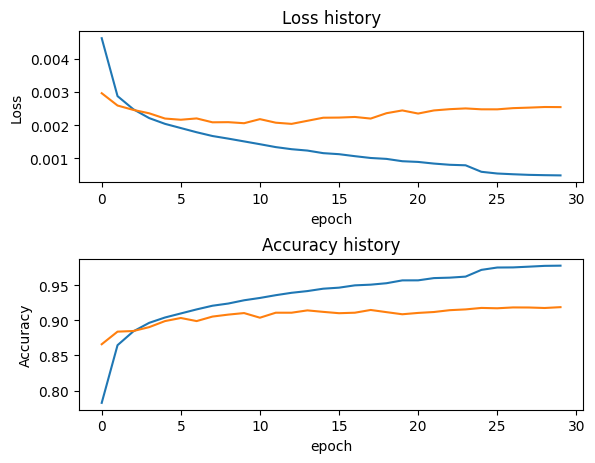

In [5]:
"""

Visualize a plot of validation accuracy curves from
the CNN model

"""
###########################################################################
# PLACE YOUR CODE HERE                                                    #
###########################################################################
import matplotlib.pyplot as plt

legend = ['Train', 'Validation']
fig, ax = plt.subplots(2, 1)

plt.subplot(2,1,1)
plt.plot(loss_hist_cnn)
plt.plot(loss_hist_val_cnn)
plt.title('Loss history')
plt.xlabel('epoch')
plt.ylabel('Loss')

fig.tight_layout(pad=2.0)

plt.subplot(2,1,2)
plt.plot(acc_hist_cnn)
plt.plot(acc_hist_val_cnn)
plt.title('Accuracy history')
plt.xlabel('epoch')
plt.ylabel('Accuracy') 

#plt.legend(legend, loc='upper left')
plt.show()
#END OF YOUR CODE                           
###########################################################################

In [6]:
pred_vec = []
correct = 0
net_cnn.eval()
with torch.no_grad():
    for data in test_loader:
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)
        outputs = net_cnn(batch)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        pred_vec.append(predicted)
    pred_vec = torch.cat(pred_vec)

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct / len(test_set)))

Accuracy on the 10000 test images: 91.48 %


## An MLP model with ReLU layers similar to the assignment 1

In [7]:
import torch.nn as nn
import torch.nn.functional as F

# Problem 2: Implementing your own CNN
# a. Convolution and MaxPooling layers


class MLP(nn.Module):
  """
  A multilayer perceptrons (MLP). In this MLP object, we will use following
  dimensions:

  input_size: the dimension d of the input data.                        
  hidden_size: the number of neurons h in the hidden layer.             
  output_size: the number of classes c, which is 10 in our task          
  """
  def __init__(self):
    """
    An initialization function. This object of network is a simple feed-forward 
    network. It takes an input to pass to muitiple layers. Then, provide the 
    output. The layers are initialized after their creation. 

    Parameters
    ----------
    N/A
    """
    super(MLP, self).__init__()

    #############################################################################
    # PLACE YOUR CODE HERE                                                      #
    ############################################################################# 
    # TODO: design your fully connected layers
    # E.g., self.fc1 = ?, self.fc2 = ?, self.fc3 = ? 
    self.fc1 = nn.Linear(in_features=28*28, out_features=1024, bias=True)
    self.fc2 = nn.Linear(in_features=1024, out_features=1024, bias=True)
    self.fc3 = nn.Linear(in_features=1024, out_features=128, bias=True)
    self.fc4 = nn.Linear(in_features=128, out_features=128, bias=True)
    self.fc5 = nn.Linear(in_features=128, out_features=32, bias=True)
    self.fc6 = nn.Linear(in_features=32, out_features=10, bias=True)
    #############################################################################
   

  def forward(self, x):
    """
    A forward pass function. Using the pre-defined network modules, we can here 
    build a model designing its structure. 

    Parameters
    ---------- 
    x: matrix  
      an input data of shape (1, d, d), where d is the dimension of the input 
      image. 
  
    Returns
    ---------- 
    out:     
      an output data given x.

    """
    #############################################################################
    # PLACE YOUR CODE HERE                                                      #
    ############################################################################# 
    # TODO: construct the fully connected neural network given x
    x = x.view(-1, 28 * 28)      # (28, 28) -> (28 * 28, )
    
    x = self.fc1(x)
    x = F.relu(x)

    x = self.fc2(x)
    x = F.relu(x)
    
    x = self.fc3(x)
    x = F.relu(x)
    
    x = self.fc4(x)
    x = F.relu(x)

    x = self.fc5(x)
    x = F.relu(x)

    x = self.fc6(x)
    x = F.relu(x)

    out = x
    #############################################################################

    return out

# create a CNN object
net = MLP()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Device:', device)
net.to(device)

num_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print("Number of trainable parameters:", num_params)

from torchsummary import summary
summary(net,(1,28,28))

Device: cuda:0
Number of trainable parameters: 2005610
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1024]         803,840
            Linear-2                 [-1, 1024]       1,049,600
            Linear-3                  [-1, 128]         131,200
            Linear-4                  [-1, 128]          16,512
            Linear-5                   [-1, 32]           4,128
            Linear-6                   [-1, 10]             330
Total params: 2,005,610
Trainable params: 2,005,610
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 7.65
Estimated Total Size (MB): 7.67
----------------------------------------------------------------


In [8]:
import torch.optim as optim

"""

 You have to define the loss, for that please use cross entropy loss      
 Also, you must implement optimizer called SGD.                           

"""

#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 
# TODO: declare your optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)
#############################################################################
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

loss_hist, acc_hist = [], []
loss_hist_val, acc_hist_val = [], []

for epoch in range(30):
  running_loss = 0.0
  correct = 0
  for data in train_loader:
    batch, labels = data
    batch, labels = batch.to(device), labels.to(device)

    """

    First, set the gradients to zero. Then obtain predictions from your CNN   
    model. After that, pass into loss to calculate the difference between the 
    prediction and labels. Next, you have to compute the gradients with       
    respect to the tensor.  


    """
    #############################################################################
    # PLACE YOUR CODE HERE                                                      #
    ############################################################################# 
    # todo optimizer and loss
    optimizer.zero_grad() # optimizer default 설정이 gradients를 계속 더하기 때문에 항상 초기화 해줘야함. 
    
    outputs = net(batch) #(batch_size, class_num) = (128, 10)
    loss = criterion(outputs, labels)
    loss.backward() 
    #############################################################################
    optimizer.step()

    # compute training statistics
    _, predicted = torch.max(outputs, 1)
    correct += (predicted == labels).sum().item()
    running_loss += loss.item()

  avg_loss = running_loss / len(train_set)
  avg_acc = correct / len(train_set)
  loss_hist.append(avg_loss)
  acc_hist.append(avg_acc)

  # validation statistics
  net.eval()
  with torch.no_grad():
    loss_val = 0.0
    correct_val = 0
    for data in val_loader:
      batch, labels = data
      batch, labels = batch.to(device), labels.to(device)
      outputs = net(batch)
      loss = criterion(outputs, labels)
      _, predicted = torch.max(outputs, 1)
      correct_val += (predicted == labels).sum().item()
      loss_val += loss.item()
    avg_loss_val = loss_val / len(val_set)
    avg_acc_val = correct_val / len(val_set)
    loss_hist_val.append(avg_loss_val)
    acc_hist_val.append(avg_acc_val)
  net.train()

  scheduler.step(avg_loss_val)
  print('[epoch %d] loss: %.5f accuracy: %.4f val loss: %.5f val accuracy: %.4f' % (epoch + 1, avg_loss, avg_acc, avg_loss_val, avg_acc_val))
     

[epoch 1] loss: 0.01146 accuracy: 0.4879 val loss: 0.00722 val accuracy: 0.6640
[epoch 2] loss: 0.00585 accuracy: 0.7291 val loss: 0.00550 val accuracy: 0.7412
[epoch 3] loss: 0.00506 accuracy: 0.7602 val loss: 0.00480 val accuracy: 0.7732
[epoch 4] loss: 0.00474 accuracy: 0.7730 val loss: 0.00474 val accuracy: 0.7798
[epoch 5] loss: 0.00452 accuracy: 0.7822 val loss: 0.00472 val accuracy: 0.7778
[epoch 6] loss: 0.00429 accuracy: 0.7908 val loss: 0.00473 val accuracy: 0.7776
[epoch 7] loss: 0.00415 accuracy: 0.7965 val loss: 0.00452 val accuracy: 0.7863
[epoch 8] loss: 0.00403 accuracy: 0.8023 val loss: 0.00459 val accuracy: 0.7849
[epoch 9] loss: 0.00394 accuracy: 0.8038 val loss: 0.00429 val accuracy: 0.7905
[epoch 10] loss: 0.00377 accuracy: 0.8117 val loss: 0.00436 val accuracy: 0.7902
[epoch 11] loss: 0.00373 accuracy: 0.8145 val loss: 0.00435 val accuracy: 0.7971
[epoch 12] loss: 0.00367 accuracy: 0.8162 val loss: 0.00457 val accuracy: 0.7830
[epoch 13] loss: 0.00356 accuracy: 0.

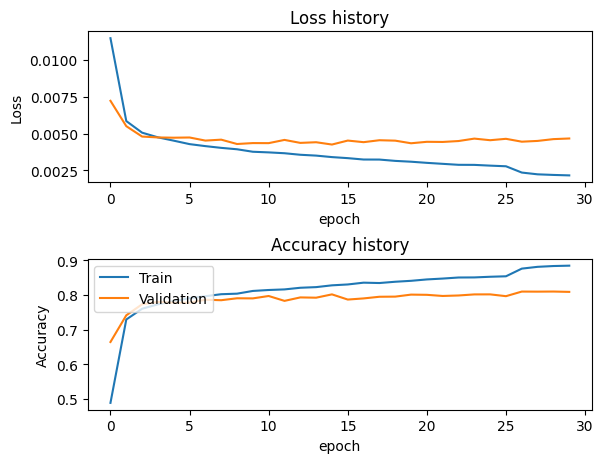

In [9]:
import matplotlib.pyplot as plt

"""

  You have to plot two graphs, one for loss of training and validation data 
  and second one for accuarcy of training and validation data.              
  Set x-axis to number of epochs and y-axis to loss or accuracy. Set legend 
  equal to training and validation set.                                      

"""
legend = ['Train', 'Validation']
#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 
fig, ax = plt.subplots(2, 1)

plt.subplot(2,1,1)
plt.plot(loss_hist)
plt.plot(loss_hist_val)
plt.title('Loss history')
plt.xlabel('epoch')
plt.ylabel('Loss')

fig.tight_layout(pad=2.0)

plt.subplot(2,1,2)
plt.plot(acc_hist)
plt.plot(acc_hist_val)
plt.title('Accuracy history')
plt.xlabel('epoch')
plt.ylabel('Accuracy') 
#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
plt.legend(legend, loc='upper left')
plt.show()


In [10]:
pred_vec = []
correct = 0
net.eval()
with torch.no_grad():
    for data in test_loader:
        batch, labels = data
        batch, labels = batch.to(device), labels.to(device)
        outputs = net(batch)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        pred_vec.append(predicted)
    pred_vec = torch.cat(pred_vec)

print('Accuracy on the 10000 test images: %.2f %%' % (100 * correct / len(test_set)))

Accuracy on the 10000 test images: 80.54 %


compare CNN vs MLP

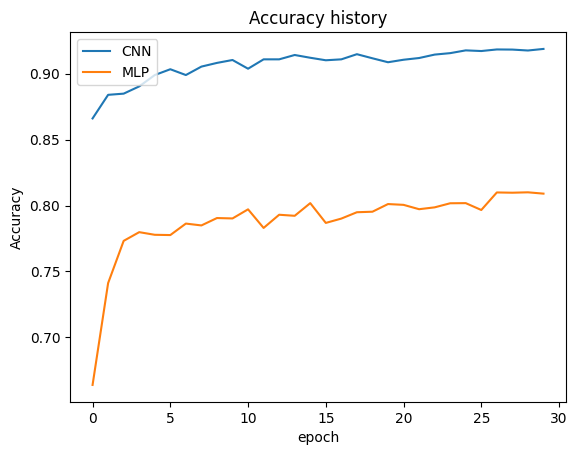

In [11]:
legend = ['CNN', 'MLP']
#############################################################################
# PLACE YOUR CODE HERE                                                      #
############################################################################# 

plt.plot(acc_hist_val_cnn)
plt.plot(acc_hist_val)
plt.title('Accuracy history')
plt.xlabel('epoch')
plt.ylabel('Accuracy') 
#############################################################################
#                              END OF YOUR CODE                             #
#############################################################################
plt.legend(legend, loc='upper left')
plt.show()
